In [8]:
import asyncio
from CrawlerHW import CrawlerHW
import pandas as pd 

In [9]:
all_articles_table = CrawlerHW.load_data_frame_from_file(CrawlerHW.ARTICLES_FILE_NAME)
all_articles_table

,date,title,url
0,2023-01-01,[正妹] 周子瑜,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...
1,2023-01-01,[帥哥] 星野結衣的老公 星野源,https://www.ptt.cc/bbs/Beauty/M.1672504503.A.A...
2,2023-01-01,[正妹] 六兔興旺,https://www.ptt.cc/bbs/Beauty/M.1672510614.A.C...
3,2023-01-01,[神人] 淘寶靴子model,https://www.ptt.cc/bbs/Beauty/M.1672512966.A.3...
4,2023-01-01,[正妹] 架乃ゆら (架乃由羅),https://www.ptt.cc/bbs/Beauty/M.1672535311.A.B...
...,...,...,...
5678,2023-12-31,[正妹] Ashley Duran 美國模特兒,https://www.ptt.cc/bbs/Beauty/M.1704025329.A.8...
5679,2023-12-31,[正妹] 罩不住喬衣服的港妹,https://www.ptt.cc/bbs/Beauty/M.1704026910.A.E...
5680,2023-12-31,[正妹] 邱子芯,https://www.ptt.cc/bbs/Beauty/M.1704027421.A.8...
5681,2023-12-31,[正妹] 趙露思跨年晚會,https://www.ptt.cc/bbs/Beauty/M.1704029071.A.B...


In [10]:
popular_articles_table = CrawlerHW.load_data_frame_from_file(CrawlerHW.POPULAR_ARTICLES_FILE_NAME)
popular_articles_table

,date,title,url
0,2023-01-01,[正妹] 六兔興旺,https://www.ptt.cc/bbs/Beauty/M.1672510614.A.C...
1,2023-01-01,[正妹] 河北彩花,https://www.ptt.cc/bbs/Beauty/M.1672575088.A.D...
2,2023-01-07,[帥哥] 台南藝術大學 吳宗岱,https://www.ptt.cc/bbs/Beauty/M.1673057995.A.3...
3,2023-01-09,[正妹] 台灣 程式設計師,https://www.ptt.cc/bbs/Beauty/M.1673238260.A.D...
4,2023-01-10,[正妹] 牡羊座,https://www.ptt.cc/bbs/Beauty/M.1673330993.A.1...
...,...,...,...
160,2023-12-26,[神人] 又一個現實的AI美女,https://www.ptt.cc/bbs/Beauty/M.1703578502.A.F...
161,2023-12-26,[正妹] 川島和津實,https://www.ptt.cc/bbs/Beauty/M.1703592656.A.8...
162,2023-12-28,[正妹] 台灣大學 肉感(慎入,https://www.ptt.cc/bbs/Beauty/M.1703737007.A.7...
163,2023-12-28,[正妹] 大橋未久,https://www.ptt.cc/bbs/Beauty/M.1703751129.A.F...


In [11]:
def get_not_popular_table(table_a , table_b):

    merged = pd.merge(table_a,table_b ,on=["title",'date'], how="outer" , indicator=True)
    merged = merged[merged["_merge"]=="left_only"]
    # merged = merged.drop(columns=["_merge" , "url_y"])
    merged = merged.sort_values(["date"])
    merged = merged.reset_index()
    merged = merged.rename(columns={"url_x":"url"})
    merged = merged.drop(columns=["_merge" , "url_y" , "index"])
    return merged

In [12]:
not_popular_table = get_not_popular_table(all_articles_table,popular_articles_table)
# not_popular_table.to_csv("sample.csv")
not_popular_table
# print(not_popular_table)

,date,title,url
0,2023-01-01,[帥哥] 星野結衣的老公 星野源,https://www.ptt.cc/bbs/Beauty/M.1672504503.A.A...
1,2023-01-01,[正妹] 86少校 coser @ C101,https://www.ptt.cc/bbs/Beauty/M.1672560758.A.A...
2,2023-01-01,[正妹] aespa Karina,https://www.ptt.cc/bbs/Beauty/M.1672586581.A.A...
3,2023-01-01,[正妹] 44歲 yuki,https://www.ptt.cc/bbs/Beauty/M.1672571868.A.1...
4,2023-01-01,[正妹] Hang(阮秋姮),https://www.ptt.cc/bbs/Beauty/M.1672537109.A.B...
...,...,...,...
5510,2023-12-31,[正妹] 林穎樂,https://www.ptt.cc/bbs/Beauty/M.1703952183.A.8...
5511,2023-12-31,[正妹] 僕青 宮腰友里亜,https://www.ptt.cc/bbs/Beauty/M.1703988045.A.3...
5512,2023-12-31,[正妹] 橋本環奈 vs 浜辺美波 NHK紅白,https://www.ptt.cc/bbs/Beauty/M.1704024551.A.8...
5513,2023-12-31,[正妹] 這是霹靂小組？,https://www.ptt.cc/bbs/Beauty/M.1704010372.A.E...


# Test the image is exists or not 

In [13]:
import httpx 

In [14]:
USER= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0"}

In [57]:
result = httpx.get("https://i.imgur.com/XaKrUlM.jpg",headers=USER)
result

<Response [302 Moved Temporarily]>

In [60]:
result.reason_phrase

'Moved Temporarily'

In [36]:
result = httpx.get("https://i.imgur.com/g4Ix06N.jpg",headers=USER)
result 

<Response [200 OK]>

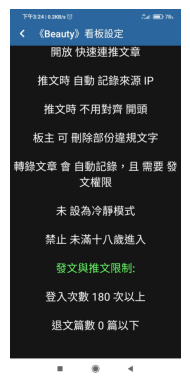

In [54]:
import io
# from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# to buffer stream
image = cv2.imdecode(np.frombuffer(result.content , np.uint16) , cv2.IMREAD_COLOR)
# cv transform color 
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()

# cv2.imshow( image)
# image = Image.open(io.BytesIO(result.content))
# image

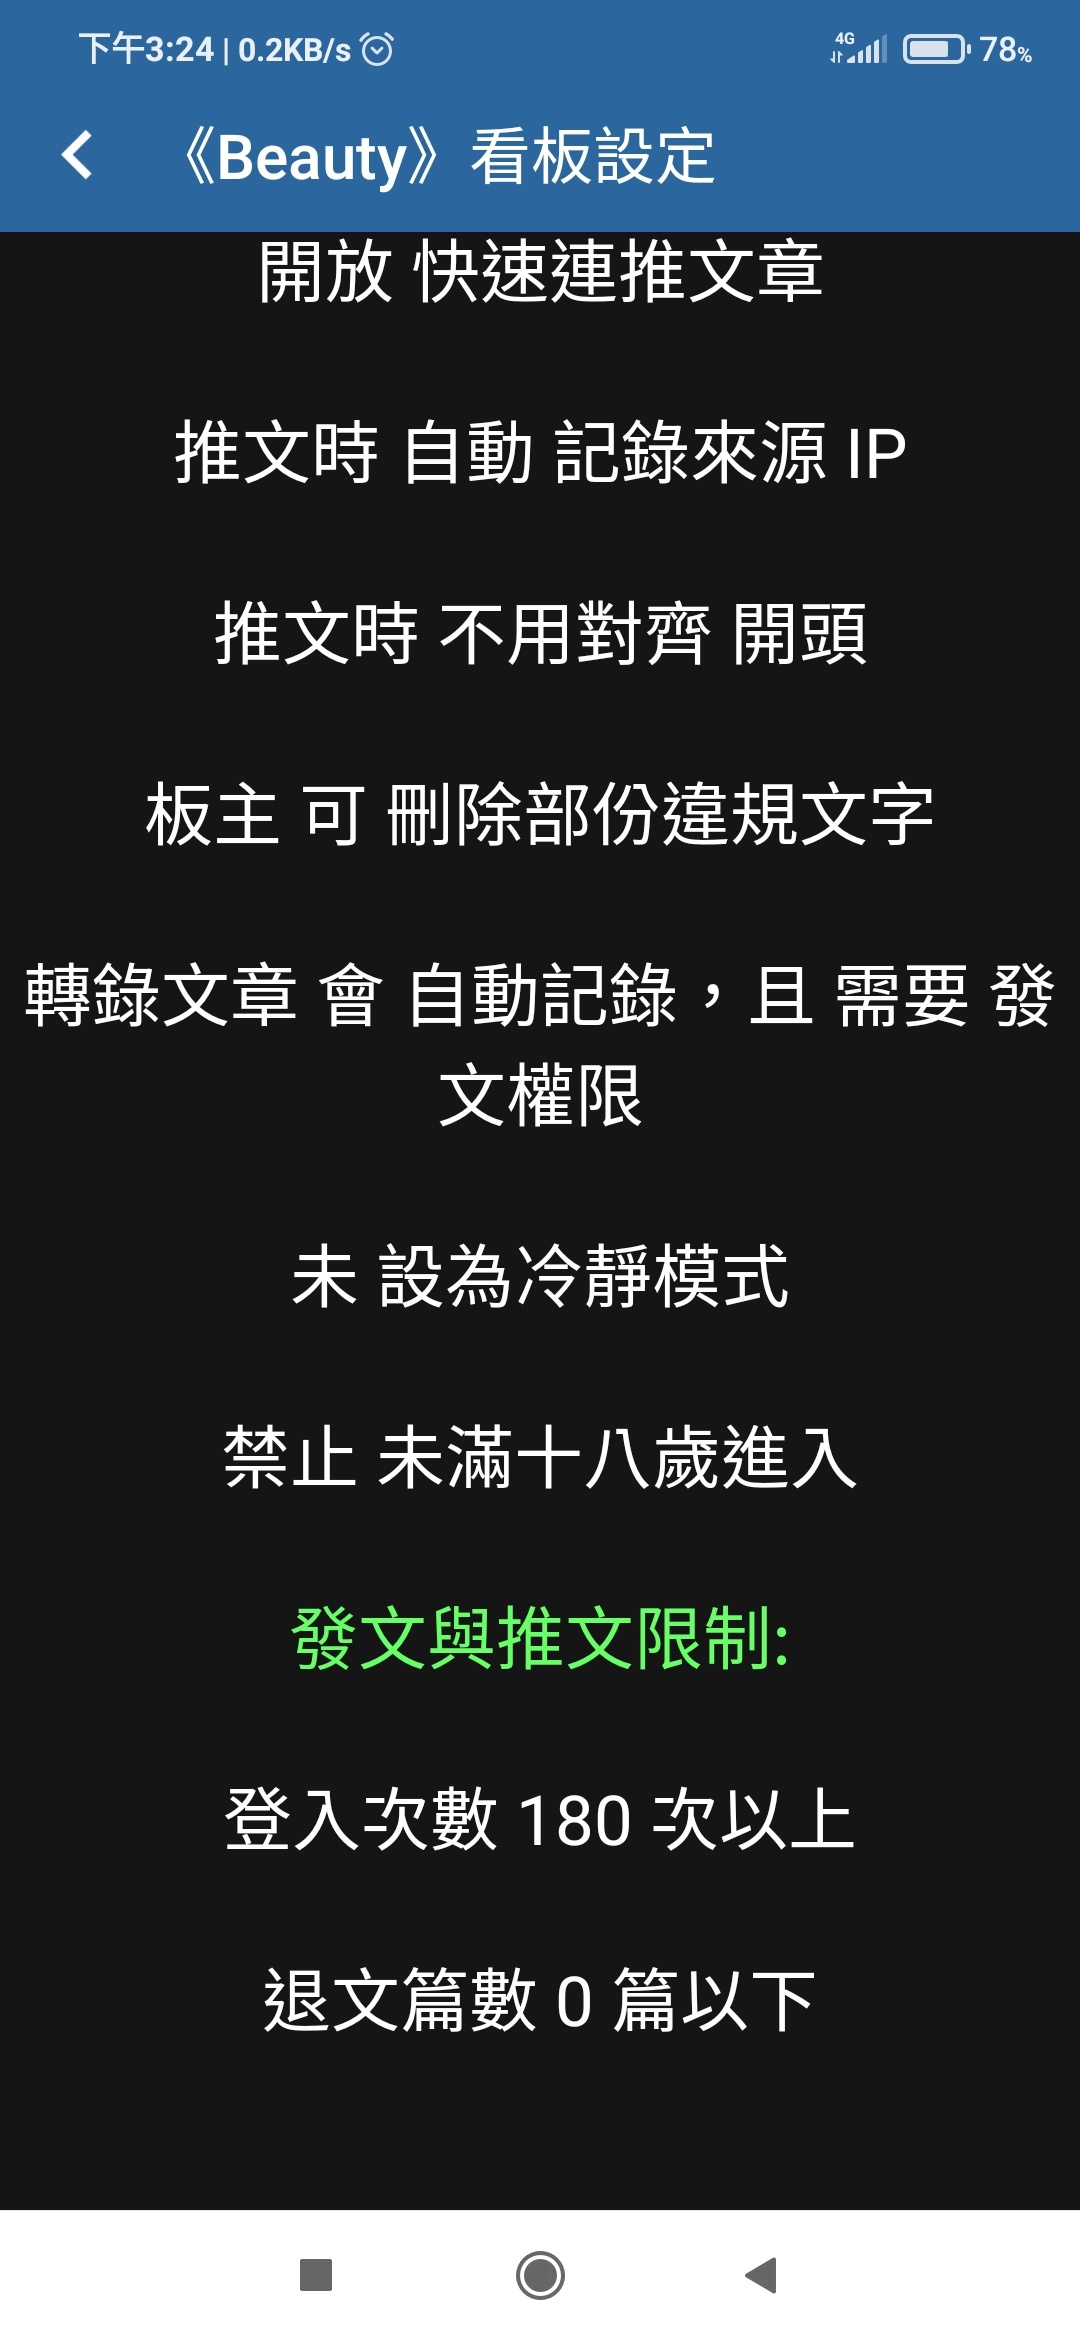

In [48]:
from PIL import Image
import io

image_pil = Image.open(io.BytesIO(result.content))
image_pil

In [17]:
file_test = "tran_data.jsonl"

import json

In [18]:
with open(file=file_test , mode="r", encoding="utf-8") as f:
    data = f.readlines()
data

['{"date": "2023-Jan-1-00:26:06", "title": "[正妹] 周子瑜", "author": "ReiKuromiya", "url": "https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html", "image_link": "https://i.imgur.com/BdmZ7Ps.jpg", "hotNumber": 71}\n',
 '{"date": "2023-Jan-1-00:26:06", "title": "[正妹] 周子瑜", "author": "ReiKuromiya", "url": "https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html", "image_link": "https://i.imgur.com/bBiw4IS.jpg", "hotNumber": 71}\n',
 '{"date": "2023-Jan-1-00:26:06", "title": "[正妹] 周子瑜", "author": "ReiKuromiya", "url": "https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html", "image_link": "https://i.imgur.com/KDmRgeg.jpg", "hotNumber": 71}\n',
 '{"date": "2023-Jan-1-00:26:06", "title": "[正妹] 周子瑜", "author": "ReiKuromiya", "url": "https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html", "image_link": "https://i.imgur.com/hRHpy8X.jpg", "hotNumber": 71}\n',
 '{"date": "2023-Jan-1-00:26:06", "title": "[正妹] 周子瑜", "author": "ReiKuromiya", "url": "https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html", 

In [19]:
data = [json.loads(item) for item in data]
data

[{'date': '2023-Jan-1-00:26:06',
  'title': '[正妹] 周子瑜',
  'author': 'ReiKuromiya',
  'url': 'https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html',
  'image_link': 'https://i.imgur.com/BdmZ7Ps.jpg',
  'hotNumber': 71},
 {'date': '2023-Jan-1-00:26:06',
  'title': '[正妹] 周子瑜',
  'author': 'ReiKuromiya',
  'url': 'https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html',
  'image_link': 'https://i.imgur.com/bBiw4IS.jpg',
  'hotNumber': 71},
 {'date': '2023-Jan-1-00:26:06',
  'title': '[正妹] 周子瑜',
  'author': 'ReiKuromiya',
  'url': 'https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html',
  'image_link': 'https://i.imgur.com/KDmRgeg.jpg',
  'hotNumber': 71},
 {'date': '2023-Jan-1-00:26:06',
  'title': '[正妹] 周子瑜',
  'author': 'ReiKuromiya',
  'url': 'https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5B5.html',
  'image_link': 'https://i.imgur.com/hRHpy8X.jpg',
  'hotNumber': 71},
 {'date': '2023-Jan-1-00:26:06',
  'title': '[正妹] 周子瑜',
  'author': 'ReiKuromiya',
  'url': 'https://www.ptt.cc/bbs/Beau

In [20]:
data_df = pd.DataFrame(data)
data_df

,date,title,author,url,image_link,hotNumber
0,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/BdmZ7Ps.jpg,71
1,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/bBiw4IS.jpg,71
2,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/KDmRgeg.jpg,71
3,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/hRHpy8X.jpg,71
4,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/P5rI8UM.jpg,71
...,...,...,...,...,...,...
67096,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/t0YhewP.gif,38
67097,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/B3SB2WY.jpg,38
67098,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/rCnbrGX.jpg,38
67099,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/zGIk6WD.jpg,38


In [28]:
def tran_to_number(hot_number):
    
    if isinstance(hot_number , str):
        if hot_number[0] == "X" :
            # hot_number = hot_number.replace("X" , "-")
            
            return int("-" + (item if (item := hot_number[1:] )!= "X" else "10"))
        if "爆" in hot_number:
            return 100
    
    return int(hot_number)

data_df["hotNumber"] = [tran_to_number(number) for number in data_df["hotNumber"]]

In [33]:
data_df["is_hot"] = (data_df["hotNumber"] > 35).astype(int)

In [34]:
data_df

,date,title,author,url,image_link,hotNumber,is_hot
0,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/BdmZ7Ps.jpg,71,1
1,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/bBiw4IS.jpg,71,1
2,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/KDmRgeg.jpg,71,1
3,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/hRHpy8X.jpg,71,1
4,2023-Jan-1-00:26:06,[正妹] 周子瑜,ReiKuromiya,https://www.ptt.cc/bbs/Beauty/M.1672503968.A.5...,https://i.imgur.com/P5rI8UM.jpg,71,1
...,...,...,...,...,...,...,...
67096,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/t0YhewP.gif,38,1
67097,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/B3SB2WY.jpg,38,1
67098,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/rCnbrGX.jpg,38,1
67099,2023-Dec-31-21:57:42,[正妹] 潤娥,wafiea708,https://www.ptt.cc/bbs/Beauty/M.1704031064.A.D...,https://i.imgur.com/zGIk6WD.jpg,38,1


In [35]:
data_df.to_csv("tran_data.csv")